## 1 - import necessary packages

In [118]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

# AD test
from arch.unitroot import ADF

# statsmodel used for time seriers test
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller 

training_file = '../智能制造训练集/train/inputs/training.csv'
testing_file = '../智能制造赛道测试集/test/testing.csv'

## 2 - loading data and define column names

In [2]:
# load training & testing file
training = pd.read_csv(training_file, low_memory=False)
testing = pd.read_csv(testing_file, low_memory=False)

numerical_features = ['oxygen_set_value', # '氧量设定值'
                      'primary_air_volume', # '一次风量'
                      'grate_manual_command',  #  '炉排手动指令'
                      'main_steam_flow_set_value', # '主蒸汽流量设定值'
                      'ejector_manual_command', #  '推料器手动指令'
                      'ejector_automatic_command', # '推料器自动指令'
                      'nox_content', # NOx含量
                      'grate_actual_operation_command', # 炉排实际运行指令
                      'secondary_air_control_door', # 二次风调门
                      'hcl_content', # HCL含量
                      'secondary_air_volume', # 二次风量
                      'water_flow', # 给水流量
                      'so2_content', # SO2含量
                      'drum_water_level', # 汽包水位
                      'induced_fan_speed', # 引风机转速
                      'co_content', # CO含量
                      'primary_damper'] # 一次风调门

categorical_features = ['ejector_automatic_switching_signal', # '推料器自动投退信号'
                        'grate_automatic_switching_signal', # '炉排自动投退信号'
                        'pusher_on_or_off', # 推料器启停
                        'grate_on_or_off'] # 炉排启停

label = ['main_steam_flow']

In [3]:
training.head()

,datetime,oxygen_set_value,primary_air_volume,ejector_automatic_switching_signal,grate_automatic_switching_signal,grate_manual_command,main_steam_flow_set_value,ejector_manual_command,ejector_automatic_command,nox_content,...,secondary_air_volume,water_flow,so2_content,pusher_on_or_off,drum_water_level,induced_fan_speed,grate_on_or_off,co_content,primary_damper,main_steam_flow
0,2021-12-20 00:00:00,5.5,72919.6563,NaN,NaN,43.9083,60.0,53.9083,53.9094,57.4444,...,4330.1270,73.4054,2.6458,NaN,1.6872,66.7986,NaN,1.6042,75.5532,54.3032
1,2021-12-20 00:00:01,5.5,73034.8047,NaN,NaN,44.0000,60.0,54.0000,54.0353,57.3889,...,4898.9800,73.5788,2.5833,NaN,1.6107,66.8056,NaN,1.5903,75.4144,54.1495
2,2021-12-20 00:00:02,5.5,73111.4609,NaN,NaN,44.0452,60.0,54.0452,54.0476,57.5556,...,4663.6895,73.7589,2.6181,NaN,1.5039,66.8195,NaN,1.6597,75.4051,54.4899
3,2021-12-20 00:00:03,5.5,73134.4375,NaN,NaN,44.0575,60.0,54.0575,54.0600,57.5370,...,4898.9800,73.9473,2.6389,NaN,1.5284,66.7894,NaN,1.6736,75.4537,54.6693
4,2021-12-20 00:00:04,5.5,73493.5625,NaN,NaN,44.0699,60.0,54.0699,54.0724,57.3889,...,4898.9800,74.1118,2.6875,NaN,1.6921,66.7662,NaN,1.6319,75.4144,54.5034


In [4]:
testing.head()

,datetime,oxygen_set_value,primary_air_volume,ejector_automatic_switching_signal,grate_automatic_switching_signal,grate_manual_command,main_steam_flow_set_value,ejector_manual_command,ejector_automatic_command,nox_content,...,hcl_content,secondary_air_volume,water_flow,so2_content,pusher_on_or_off,drum_water_level,induced_fan_speed,grate_on_or_off,co_content,primary_damper
0,2021-12-22 23:30:00,25.0,72881.2344,False,False,50.0,60.0,40.0,70.0,111.4074,...,2.8333,18553.9766,68.6522,3.2569,False,7.5292,67.4120,False,2.5278,65.5370
1,2021-12-22 23:30:01,25.0,73729.4688,False,False,50.0,60.0,40.0,70.0,111.4074,...,2.8194,18472.9531,68.6643,3.2778,False,7.4884,67.4167,False,2.5208,65.5532
2,2021-12-22 23:30:02,25.0,74221.6875,False,False,50.0,60.0,40.0,70.0,111.4630,...,2.7593,18553.9766,68.6404,3.3194,False,7.4432,67.4468,False,2.5625,65.5463
3,2021-12-22 23:30:03,25.0,73600.1953,False,False,50.0,60.0,40.0,70.0,109.3333,...,2.5093,18553.9766,68.6220,2.8958,False,7.4716,67.4306,False,1.0347,65.5231
4,2021-12-22 23:30:04,25.0,73057.8047,False,False,50.0,60.0,40.0,70.0,109.2593,...,2.5046,18614.5098,68.6118,2.8333,False,7.5600,67.4468,False,0.9722,65.5463


In [5]:
training[numerical_features].head()

,oxygen_set_value,primary_air_volume,grate_manual_command,main_steam_flow_set_value,ejector_manual_command,ejector_automatic_command,nox_content,grate_actual_operation_command,secondary_air_control_door,hcl_content,secondary_air_volume,water_flow,so2_content,drum_water_level,induced_fan_speed,co_content,primary_damper
0,5.5,72919.6563,43.9083,60.0,53.9083,53.9094,57.4444,43.9078,20.4653,6.1991,4330.1270,73.4054,2.6458,1.6872,66.7986,1.6042,75.5532
1,5.5,73034.8047,44.0000,60.0,54.0000,54.0353,57.3889,43.9126,20.5810,6.2315,4898.9800,73.5788,2.5833,1.6107,66.8056,1.5903,75.4144
2,5.5,73111.4609,44.0452,60.0,54.0452,54.0476,57.5556,44.0439,20.6806,6.2176,4663.6895,73.7589,2.6181,1.5039,66.8195,1.6597,75.4051
3,5.5,73134.4375,44.0575,60.0,54.0575,54.0600,57.5370,44.0551,20.6991,6.2083,4898.9800,73.9473,2.6389,1.5284,66.7894,1.6736,75.4537
4,5.5,73493.5625,44.0699,60.0,54.0699,54.0724,57.3889,44.0674,20.8542,6.1991,4898.9800,74.1118,2.6875,1.6921,66.7662,1.6319,75.4144


## 3 - handle na for categorical columns

In [6]:
training[categorical_features].head()

,ejector_automatic_switching_signal,grate_automatic_switching_signal,pusher_on_or_off,grate_on_or_off
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [7]:
training[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257398 entries, 0 to 257397
Data columns (total 4 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   ejector_automatic_switching_signal  257382 non-null  object
 1   grate_automatic_switching_signal    257382 non-null  object
 2   pusher_on_or_off                    257382 non-null  object
 3   grate_on_or_off                     257382 non-null  object
dtypes: object(4)
memory usage: 7.9+ MB


In [8]:
training['ejector_automatic_switching_signal'].value_counts()

True     138080
False    119302
Name: ejector_automatic_switching_signal, dtype: int64

In [9]:
# display all the NA values
training[training['ejector_automatic_switching_signal'].isna()]

,datetime,oxygen_set_value,primary_air_volume,ejector_automatic_switching_signal,grate_automatic_switching_signal,grate_manual_command,main_steam_flow_set_value,ejector_manual_command,ejector_automatic_command,nox_content,...,secondary_air_volume,water_flow,so2_content,pusher_on_or_off,drum_water_level,induced_fan_speed,grate_on_or_off,co_content,primary_damper,main_steam_flow
0,2021-12-20 00:00:00,5.5,72919.6563,NaN,NaN,43.9083,60.0,53.9083,53.9094,57.4444,...,4330.1270,73.4054,2.6458,NaN,1.6872,66.7986,NaN,1.6042,75.5532,54.3032
1,2021-12-20 00:00:01,5.5,73034.8047,NaN,NaN,44.0000,60.0,54.0000,54.0353,57.3889,...,4898.9800,73.5788,2.5833,NaN,1.6107,66.8056,NaN,1.5903,75.4144,54.1495
2,2021-12-20 00:00:02,5.5,73111.4609,NaN,NaN,44.0452,60.0,54.0452,54.0476,57.5556,...,4663.6895,73.7589,2.6181,NaN,1.5039,66.8195,NaN,1.6597,75.4051,54.4899
3,2021-12-20 00:00:03,5.5,73134.4375,NaN,NaN,44.0575,60.0,54.0575,54.0600,57.5370,...,4898.9800,73.9473,2.6389,NaN,1.5284,66.7894,NaN,1.6736,75.4537,54.6693
4,2021-12-20 00:00:04,5.5,73493.5625,NaN,NaN,44.0699,60.0,54.0699,54.0724,57.3889,...,4898.9800,74.1118,2.6875,NaN,1.6921,66.7662,NaN,1.6319,75.4144,54.5034
5,2021-12-20 00:00:05,5.5,72927.3359,NaN,NaN,44.0823,60.0,54.0823,54.0847,56.9259,...,4898.9800,74.2273,2.8958,NaN,1.7617,66.7801,NaN,1.7708,75.3588,54.4814
86401,2021-12-21 00:00:01,5.5,70466.1641,NaN,NaN,49.7523,60.0,79.7523,79.7519,86.4444,...,5408.3271,69.2164,0.0276,NaN,5.3432,67.3310,NaN,0.5625,75.6019,53.7651
86402,2021-12-21 00:00:02,5.5,69843.3281,NaN,NaN,49.7514,60.0,79.7514,79.7519,86.4074,...,5196.1523,69.3500,0.0554,NaN,5.3104,67.3241,NaN,0.5417,75.5556,53.9030
86403,2021-12-21 00:00:03,5.5,68857.8594,NaN,NaN,49.7514,60.0,79.7514,79.7518,86.4074,...,5123.4751,69.4572,-0.0139,NaN,5.2807,67.3079,NaN,0.5000,75.5463,53.9529
86404,2021-12-21 00:00:04,5.5,69198.7031,NaN,NaN,49.7514,60.0,79.7514,79.7518,85.6481,...,5123.4751,69.5473,-0.0347,NaN,5.2564,67.3148,NaN,0.2708,75.5833,53.9734


In [14]:
training.head(10)

,datetime,oxygen_set_value,primary_air_volume,ejector_automatic_switching_signal,grate_automatic_switching_signal,grate_manual_command,main_steam_flow_set_value,ejector_manual_command,ejector_automatic_command,nox_content,...,secondary_air_volume,water_flow,so2_content,pusher_on_or_off,drum_water_level,induced_fan_speed,grate_on_or_off,co_content,primary_damper,main_steam_flow
0,2021-12-20 00:00:00,5.5,72919.6563,True,True,43.9083,60.0,53.9083,53.9094,57.4444,...,4330.1270,73.4054,2.6458,True,1.6872,66.7986,True,1.6042,75.5532,54.3032
1,2021-12-20 00:00:01,5.5,73034.8047,True,True,44.0000,60.0,54.0000,54.0353,57.3889,...,4898.9800,73.5788,2.5833,True,1.6107,66.8056,True,1.5903,75.4144,54.1495
2,2021-12-20 00:00:02,5.5,73111.4609,True,True,44.0452,60.0,54.0452,54.0476,57.5556,...,4663.6895,73.7589,2.6181,True,1.5039,66.8195,True,1.6597,75.4051,54.4899
3,2021-12-20 00:00:03,5.5,73134.4375,True,True,44.0575,60.0,54.0575,54.0600,57.5370,...,4898.9800,73.9473,2.6389,True,1.5284,66.7894,True,1.6736,75.4537,54.6693
4,2021-12-20 00:00:04,5.5,73493.5625,True,True,44.0699,60.0,54.0699,54.0724,57.3889,...,4898.9800,74.1118,2.6875,True,1.6921,66.7662,True,1.6319,75.4144,54.5034
5,2021-12-20 00:00:05,5.5,72927.3359,True,True,44.0823,60.0,54.0823,54.0847,56.9259,...,4898.9800,74.2273,2.8958,True,1.7617,66.7801,True,1.7708,75.3588,54.4814
6,2021-12-20 00:00:06,5.5,72565.4141,True,True,44.0946,60.0,54.0946,54.0971,57.0556,...,4898.9800,74.3151,2.8819,True,1.8370,66.8195,True,1.8403,75.2477,54.4935
7,2021-12-20 00:00:07,5.5,71991.8828,True,True,44.0435,60.0,54.0435,54.0387,57.1111,...,4898.9800,74.3242,2.8542,True,1.9551,66.8426,True,1.8681,75.2384,54.4664
8,2021-12-20 00:00:08,5.5,71781.4844,True,True,44.0453,60.0,54.0453,54.0469,56.9444,...,4898.9800,74.2533,2.8472,True,2.0904,66.8356,True,1.8264,75.3657,54.5466
9,2021-12-20 00:00:09,5.5,72240.4453,True,True,44.0535,60.0,54.0535,54.0552,56.7593,...,5123.4751,74.2104,2.9236,True,2.2391,66.8773,True,1.8403,75.3426,54.5126


In [10]:
training.loc[(training['datetime'] <= '2021-12-22 00:00:10') & (training['datetime'] >= '2021-12-21 23:59:55')]

,datetime,oxygen_set_value,primary_air_volume,ejector_automatic_switching_signal,grate_automatic_switching_signal,grate_manual_command,main_steam_flow_set_value,ejector_manual_command,ejector_automatic_command,nox_content,...,secondary_air_volume,water_flow,so2_content,pusher_on_or_off,drum_water_level,induced_fan_speed,grate_on_or_off,co_content,primary_damper,main_steam_flow
172793,2021-12-21 23:59:55,6.0,66084.8047,True,True,60.0,60.0,60.0,60.0,55.9259,...,4330.1270,77.6154,4.1319,False,17.8062,62.7778,False,2.6667,60.5602,60.6568
172794,2021-12-21 23:59:56,6.0,65540.0547,True,True,60.0,60.0,60.0,60.0,55.7222,...,4330.1270,77.4718,4.0625,False,17.8111,62.9028,False,2.7292,60.5208,61.3058
172795,2021-12-21 23:59:57,6.0,64947.6133,True,True,60.0,60.0,60.0,60.0,55.6852,...,4582.5752,77.3320,4.1250,False,17.6475,63.1435,False,2.7153,60.5995,62.0393
172796,2021-12-21 23:59:58,6.0,65445.9648,True,True,60.0,60.0,60.0,60.0,56.4815,...,4330.1270,77.2139,4.7986,False,17.4247,63.2060,False,2.6875,60.5856,61.8767
172797,2021-12-21 23:59:59,6.0,65676.6641,True,True,60.0,60.0,60.0,60.0,56.3148,...,4330.1270,77.0856,4.8681,False,17.3209,63.1736,False,2.6875,60.4607,61.6311
172798,2021-12-22 00:00:00,6.0,65042.4258,True,True,60.0,60.0,60.0,60.0,56.3889,...,4330.1270,77.0035,4.8750,False,17.1928,63.1296,False,2.6667,60.2407,61.6909
172799,2021-12-22 00:00:01,6.0,64419.3359,NaN,NaN,60.0,60.0,60.0,60.0,56.2407,...,4330.1270,77.0324,4.8542,NaN,17.0795,63.0370,NaN,2.7083,60.3333,61.3692
172800,2021-12-22 00:00:02,6.0,64800.8242,NaN,NaN,60.0,60.0,60.0,60.0,56.2963,...,4330.1270,77.0979,4.8125,NaN,17.0938,63.0532,NaN,2.7361,60.4792,61.4332
172801,2021-12-22 00:00:03,6.0,66169.5234,NaN,NaN,60.0,60.0,60.0,60.0,56.2963,...,4582.5752,77.2415,4.7639,NaN,17.2114,63.0579,NaN,2.7569,60.5208,61.3655
172802,2021-12-22 00:00:04,6.0,66389.2734,NaN,NaN,60.0,60.0,60.0,60.0,56.4259,...,4330.1270,77.3591,4.8056,NaN,17.4172,63.1042,NaN,2.7778,60.5370,61.4266


In [11]:
# fill NA values using backfill func
training[categorical_features] = training[categorical_features].fillna(method='backfill')

In [12]:
# after filling
training.head(10)

,datetime,oxygen_set_value,primary_air_volume,ejector_automatic_switching_signal,grate_automatic_switching_signal,grate_manual_command,main_steam_flow_set_value,ejector_manual_command,ejector_automatic_command,nox_content,...,secondary_air_volume,water_flow,so2_content,pusher_on_or_off,drum_water_level,induced_fan_speed,grate_on_or_off,co_content,primary_damper,main_steam_flow
0,2021-12-20 00:00:00,5.5,72919.6563,True,True,43.9083,60.0,53.9083,53.9094,57.4444,...,4330.1270,73.4054,2.6458,True,1.6872,66.7986,True,1.6042,75.5532,54.3032
1,2021-12-20 00:00:01,5.5,73034.8047,True,True,44.0000,60.0,54.0000,54.0353,57.3889,...,4898.9800,73.5788,2.5833,True,1.6107,66.8056,True,1.5903,75.4144,54.1495
2,2021-12-20 00:00:02,5.5,73111.4609,True,True,44.0452,60.0,54.0452,54.0476,57.5556,...,4663.6895,73.7589,2.6181,True,1.5039,66.8195,True,1.6597,75.4051,54.4899
3,2021-12-20 00:00:03,5.5,73134.4375,True,True,44.0575,60.0,54.0575,54.0600,57.5370,...,4898.9800,73.9473,2.6389,True,1.5284,66.7894,True,1.6736,75.4537,54.6693
4,2021-12-20 00:00:04,5.5,73493.5625,True,True,44.0699,60.0,54.0699,54.0724,57.3889,...,4898.9800,74.1118,2.6875,True,1.6921,66.7662,True,1.6319,75.4144,54.5034
5,2021-12-20 00:00:05,5.5,72927.3359,True,True,44.0823,60.0,54.0823,54.0847,56.9259,...,4898.9800,74.2273,2.8958,True,1.7617,66.7801,True,1.7708,75.3588,54.4814
6,2021-12-20 00:00:06,5.5,72565.4141,True,True,44.0946,60.0,54.0946,54.0971,57.0556,...,4898.9800,74.3151,2.8819,True,1.8370,66.8195,True,1.8403,75.2477,54.4935
7,2021-12-20 00:00:07,5.5,71991.8828,True,True,44.0435,60.0,54.0435,54.0387,57.1111,...,4898.9800,74.3242,2.8542,True,1.9551,66.8426,True,1.8681,75.2384,54.4664
8,2021-12-20 00:00:08,5.5,71781.4844,True,True,44.0453,60.0,54.0453,54.0469,56.9444,...,4898.9800,74.2533,2.8472,True,2.0904,66.8356,True,1.8264,75.3657,54.5466
9,2021-12-20 00:00:09,5.5,72240.4453,True,True,44.0535,60.0,54.0535,54.0552,56.7593,...,5123.4751,74.2104,2.9236,True,2.2391,66.8773,True,1.8403,75.3426,54.5126


In [13]:
training.loc[(training['datetime'] <= '2021-12-22 00:00:10') & (training['datetime'] >= '2021-12-21 23:59:55')]

,datetime,oxygen_set_value,primary_air_volume,ejector_automatic_switching_signal,grate_automatic_switching_signal,grate_manual_command,main_steam_flow_set_value,ejector_manual_command,ejector_automatic_command,nox_content,...,secondary_air_volume,water_flow,so2_content,pusher_on_or_off,drum_water_level,induced_fan_speed,grate_on_or_off,co_content,primary_damper,main_steam_flow
172793,2021-12-21 23:59:55,6.0,66084.8047,True,True,60.0,60.0,60.0,60.0,55.9259,...,4330.1270,77.6154,4.1319,False,17.8062,62.7778,False,2.6667,60.5602,60.6568
172794,2021-12-21 23:59:56,6.0,65540.0547,True,True,60.0,60.0,60.0,60.0,55.7222,...,4330.1270,77.4718,4.0625,False,17.8111,62.9028,False,2.7292,60.5208,61.3058
172795,2021-12-21 23:59:57,6.0,64947.6133,True,True,60.0,60.0,60.0,60.0,55.6852,...,4582.5752,77.3320,4.1250,False,17.6475,63.1435,False,2.7153,60.5995,62.0393
172796,2021-12-21 23:59:58,6.0,65445.9648,True,True,60.0,60.0,60.0,60.0,56.4815,...,4330.1270,77.2139,4.7986,False,17.4247,63.2060,False,2.6875,60.5856,61.8767
172797,2021-12-21 23:59:59,6.0,65676.6641,True,True,60.0,60.0,60.0,60.0,56.3148,...,4330.1270,77.0856,4.8681,False,17.3209,63.1736,False,2.6875,60.4607,61.6311
172798,2021-12-22 00:00:00,6.0,65042.4258,True,True,60.0,60.0,60.0,60.0,56.3889,...,4330.1270,77.0035,4.8750,False,17.1928,63.1296,False,2.6667,60.2407,61.6909
172799,2021-12-22 00:00:01,6.0,64419.3359,True,True,60.0,60.0,60.0,60.0,56.2407,...,4330.1270,77.0324,4.8542,False,17.0795,63.0370,False,2.7083,60.3333,61.3692
172800,2021-12-22 00:00:02,6.0,64800.8242,True,True,60.0,60.0,60.0,60.0,56.2963,...,4330.1270,77.0979,4.8125,False,17.0938,63.0532,False,2.7361,60.4792,61.4332
172801,2021-12-22 00:00:03,6.0,66169.5234,True,True,60.0,60.0,60.0,60.0,56.2963,...,4582.5752,77.2415,4.7639,False,17.2114,63.0579,False,2.7569,60.5208,61.3655
172802,2021-12-22 00:00:04,6.0,66389.2734,True,True,60.0,60.0,60.0,60.0,56.4259,...,4330.1270,77.3591,4.8056,False,17.4172,63.1042,False,2.7778,60.5370,61.4266


## 4 - sanity check numeric columns
- make sure no obvious errors
- pay attention to possible outliers

In [15]:
training[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
oxygen_set_value,257398.0,6.201318,2.359463,2.8828,5.500000,5.50000,6.000000,25.0000
primary_air_volume,257398.0,78918.051160,16030.204657,19971.2715,70147.445300,77882.49220,91782.687500,122637.0469
grate_manual_command,257398.0,50.638502,10.599538,30.0000,40.000000,50.00000,57.968600,100.0000
main_steam_flow_set_value,257398.0,60.211712,3.651101,42.6552,60.000000,60.00000,62.000000,70.0361
ejector_manual_command,257398.0,65.254412,13.990916,30.0000,55.000000,60.00000,74.727900,100.0002
ejector_automatic_command,257398.0,65.671106,11.997825,40.0000,56.231900,61.53475,72.232925,100.0002
nox_content,257398.0,64.268478,14.453690,20.2778,54.611100,62.77780,71.722200,134.5370
grate_actual_operation_command,257398.0,50.637807,10.598782,29.9998,40.000000,50.00000,57.972500,100.0000
secondary_air_control_door,257398.0,24.525707,17.042472,9.6852,19.650300,19.71060,20.838000,89.9792
hcl_content,257398.0,6.750722,4.698083,0.4074,4.023100,5.73610,8.041700,58.0046


## 5 - check correaltion between features and labels

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, 'oxygen_set_value'),
  Text(1.5, 0, 'primary_air_volume'),
  Text(2.5, 0, 'grate_manual_command'),
  Text(3.5, 0, 'main_steam_flow_set_value'),
  Text(4.5, 0, 'ejector_manual_command'),
  Text(5.5, 0, 'ejector_automatic_command'),
  Text(6.5, 0, 'nox_content'),
  Text(7.5, 0, 'grate_actual_operation_command'),
  Text(8.5, 0, 'secondary_air_control_door'),
  Text(9.5, 0, 'hcl_content'),
  Text(10.5, 0, 'secondary_air_volume'),
  Text(11.5, 0, 'water_flow'),
  Text(12.5, 0, 'so2_content'),
  Text(13.5, 0, 'drum_water_level'),
  Text(14.5, 0, 'induced_fan_speed'),
  Text(15.5, 0, 'co_content'),
  Text(16.5, 0, 'primary_damper'),
  Text(17.5, 0, 'main_steam_flow')])

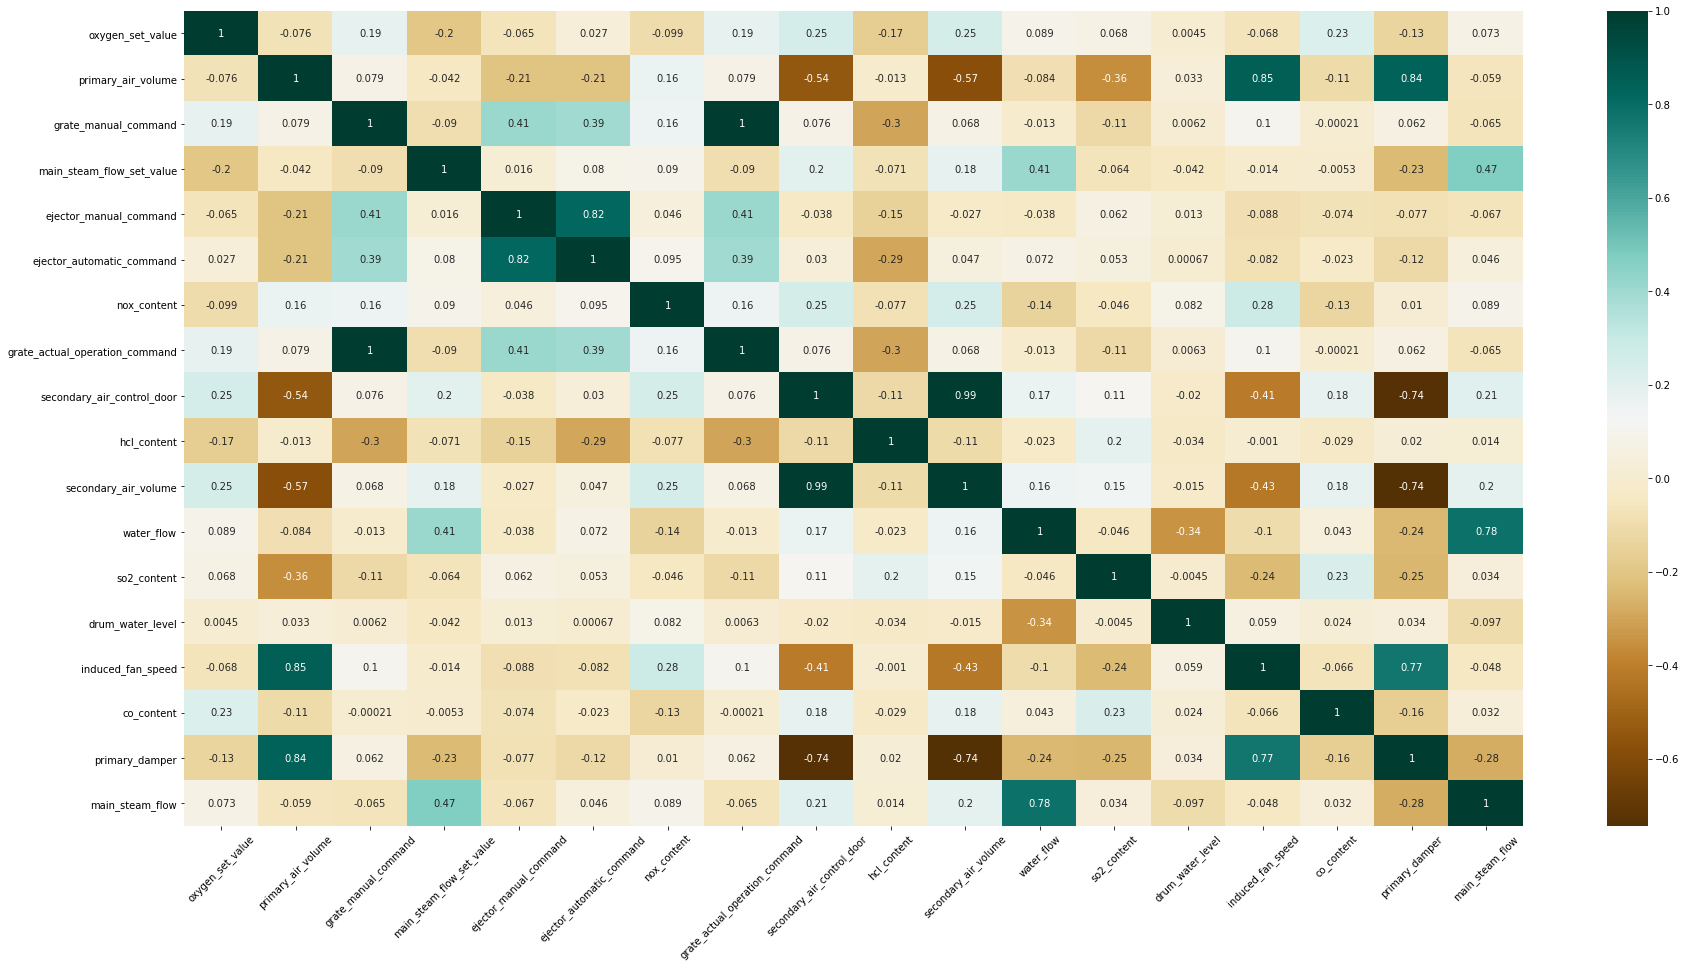

In [16]:
corr_df = training[numerical_features + label].corr()

plt.figure(figsize=(30, 15))
sns.heatmap(corr_df, cmap='BrBG', annot=True)
plt.xticks(rotation=45)

### ejector_automatic_switching_signal - True Vs False

<AxesSubplot:title={'center':'False'}, xlabel='main_steam_flow', ylabel='Count'>

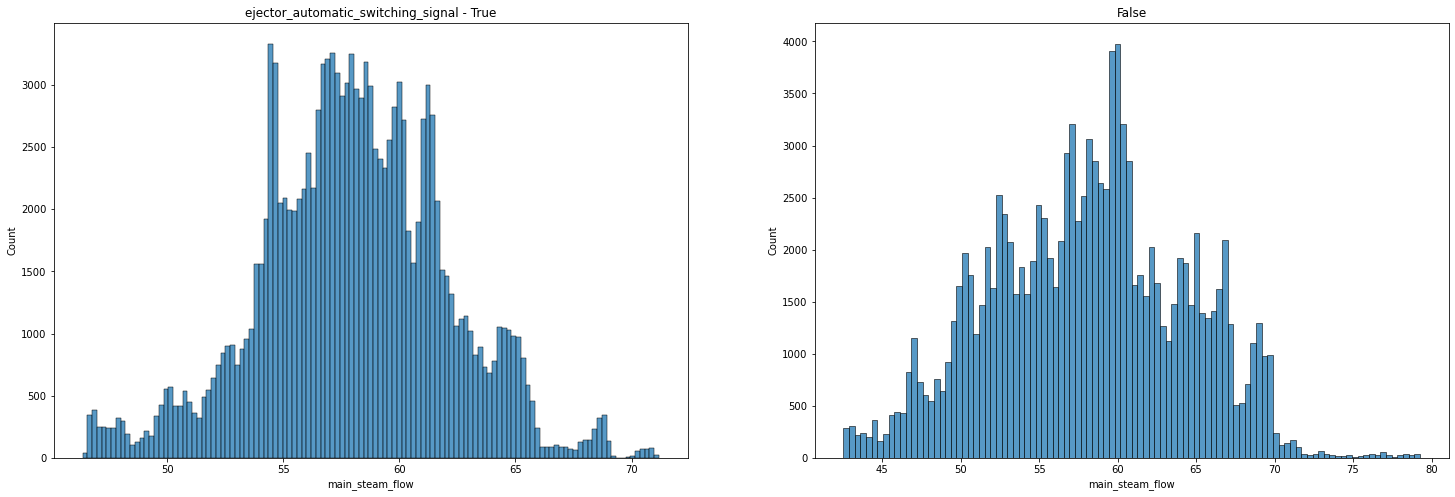

In [134]:
fig, axes = plt.subplots(1, 2)
axes[0].set_title("ejector_automatic_switching_signal - True")
axes[1].set_title("ejector_automatic_switching_signal - False")
sns.histplot(data=training.loc[training['ejector_automatic_switching_signal'] == True], x="main_steam_flow", ax=axes[0])
sns.histplot(data=training.loc[training['ejector_automatic_switching_signal'] == False], x="main_steam_flow", ax=axes[1])

<AxesSubplot:title={'center':'grate_automatic_switching_signal - False'}, xlabel='main_steam_flow', ylabel='Count'>

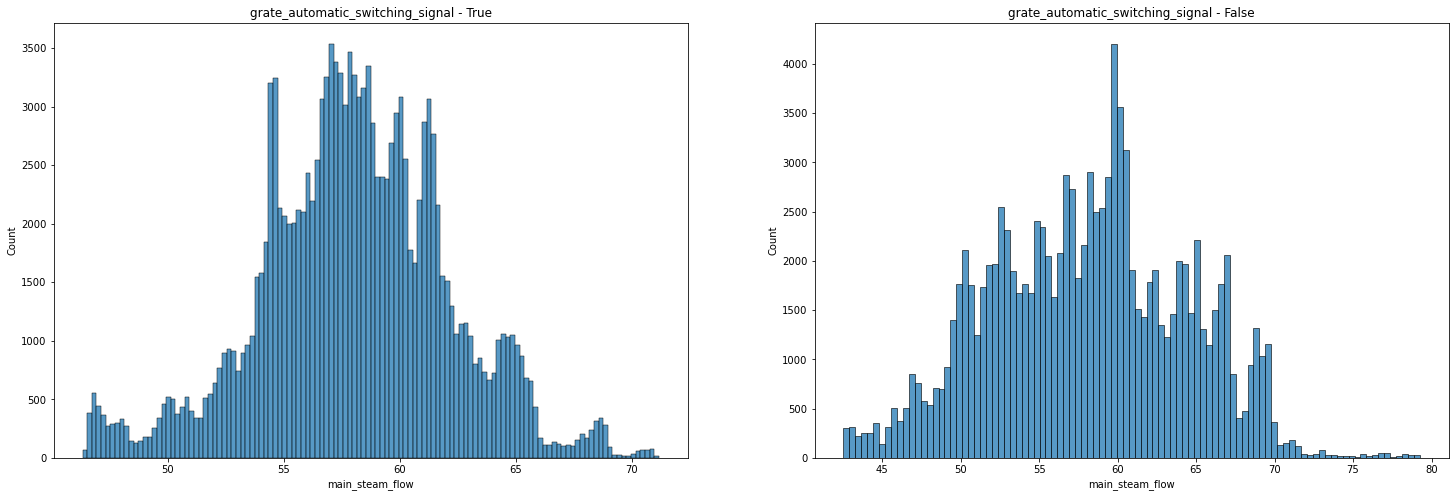

In [137]:
fig, axes = plt.subplots(1, 2)
axes[0].set_title("grate_automatic_switching_signal - True")
axes[1].set_title("grate_automatic_switching_signal - False")
sns.histplot(data=training.loc[training['grate_automatic_switching_signal'] == True], x="main_steam_flow", ax=axes[0])
sns.histplot(data=training.loc[training['grate_automatic_switching_signal'] == False], x="main_steam_flow", ax=axes[1])

<AxesSubplot:title={'center':'pusher_on_or_off - False'}, xlabel='main_steam_flow', ylabel='Count'>

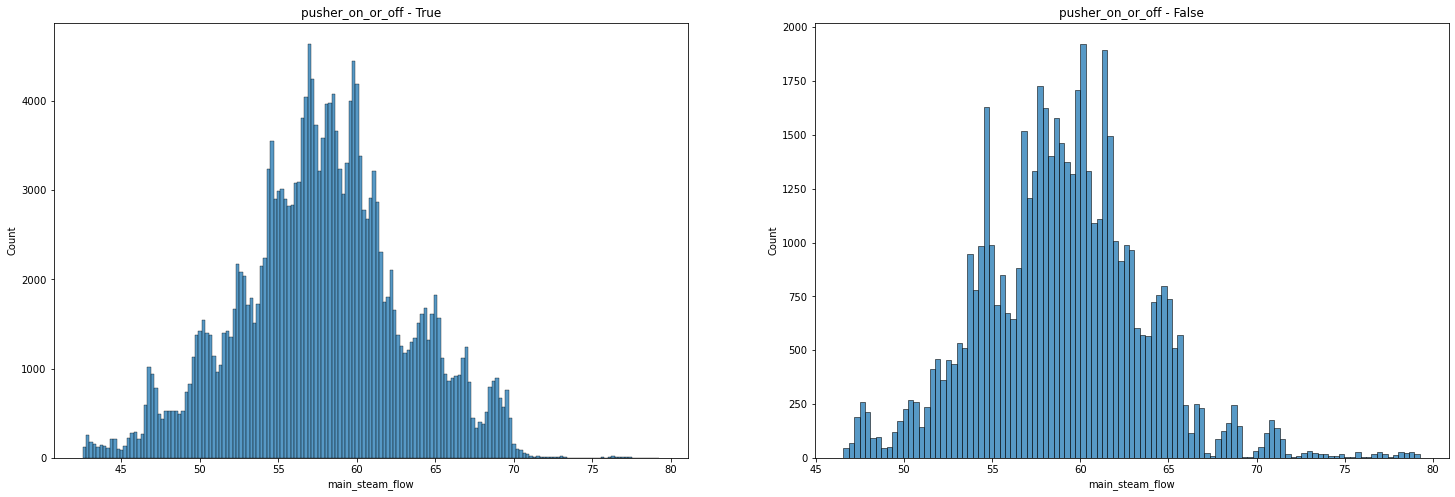

In [135]:
fig, axes = plt.subplots(1, 2)
axes[0].set_title("pusher_on_or_off - True")
axes[1].set_title("pusher_on_or_off - False")
sns.histplot(data=training.loc[training['pusher_on_or_off'] == True], x="main_steam_flow", ax=axes[0])
sns.histplot(data=training.loc[training['pusher_on_or_off'] == False], x="main_steam_flow", ax=axes[1])

<AxesSubplot:title={'center':'grate_on_or_off - False'}, xlabel='main_steam_flow', ylabel='Count'>

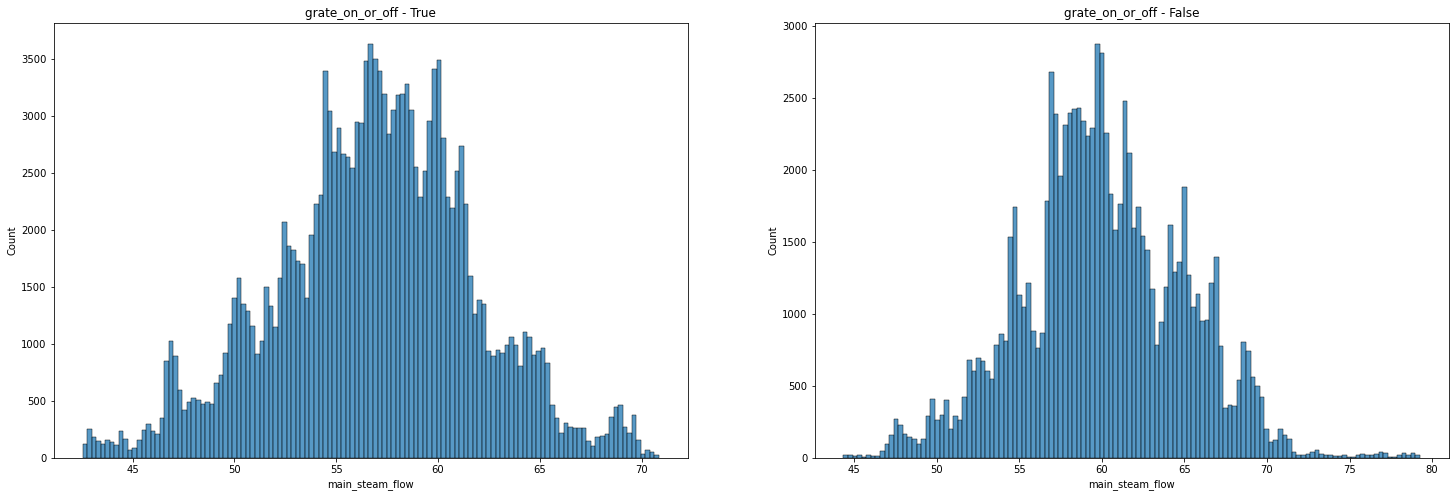

In [136]:
fig, axes = plt.subplots(1, 2)
axes[0].set_title("grate_on_or_off - True")
axes[1].set_title("grate_on_or_off - False")
sns.histplot(data=training.loc[training['grate_on_or_off'] == True], x="main_steam_flow", ax=axes[0])
sns.histplot(data=training.loc[training['grate_on_or_off'] == False], x="main_steam_flow", ax=axes[1])

## 6 - check time serise features

In [70]:
# sorting make sure data is in order
training.sort_values(by=['datetime'], ascending=True, inplace=True)
training[['datetime']].head()

,datetime
0,2021-12-20 00:00:00
1,2021-12-20 00:00:01
2,2021-12-20 00:00:02
3,2021-12-20 00:00:03
4,2021-12-20 00:00:04


In [71]:
training[['datetime']].tail()

,datetime
257393,2021-12-22 23:29:55
257394,2021-12-22 23:29:56
257395,2021-12-22 23:29:57
257396,2021-12-22 23:29:58
257397,2021-12-22 23:29:59


In [99]:
ts_df = training[['datetime', 'main_steam_flow']]

ts_df['diff1'] = ts_df['main_steam_flow'].diff(1)

ts_df['diff2'] = ts_df['diff1'].diff(1)

ts_df

<ipython-input-99-f2b2bead0b86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df['diff1'] = ts_df['main_steam_flow'].diff(1)
<ipython-input-99-f2b2bead0b86>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df['diff2'] = ts_df['diff1'].diff(1)


,datetime,main_steam_flow,diff1,diff2
0,2021-12-20 00:00:00,54.3032,NaN,NaN
1,2021-12-20 00:00:01,54.1495,-0.1537,NaN
2,2021-12-20 00:00:02,54.4899,0.3404,0.4941
3,2021-12-20 00:00:03,54.6693,0.1794,-0.1610
4,2021-12-20 00:00:04,54.5034,-0.1659,-0.3453
...,...,...,...,...
257393,2021-12-22 23:29:55,57.7807,0.1015,0.1195
257394,2021-12-22 23:29:56,57.7987,0.0180,-0.0835
257395,2021-12-22 23:29:57,57.7698,-0.0289,-0.0469
257396,2021-12-22 23:29:58,57.7407,-0.0291,-0.0002


## 6.1 stationary test

In [100]:
# using statsmodel do AD test
result = adfuller(ts_df.main_steam_flow, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -8.446360772158823
n_lags: 1.7085745173668486e-13
p-value: 1.7085745173668486e-13
Critial Values:
   1%, -3.4303754142467184
Critial Values:
   5%, -2.8615512327745627
Critial Values:
   10%, -2.56677597879965


In [101]:
# using arch.unitroot to AD test
adf = ADF(ts_df.main_steam_flow)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -8.446
P-value                         0.000
Lags                               86
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [103]:
# using arch.unitroot to AD test
adf = ADF(ts_df.diff1.dropna())
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -43.721
P-value                         0.000
Lags                               86
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [104]:
# using arch.unitroot to AD test
adf = ADF(ts_df.diff2.dropna())
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -90.738
P-value                         0.000
Lags                               86
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## 6.2 white noise test

In [73]:
ljungbox_result = acorr_ljungbox(ts_df.main_steam_flow, lags=[i for i in range(1, 12)])
ljungbox_result

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([ 257116.70521281,  514198.79669672,  771232.98165613,
        1028206.74631861, 1285107.8410281 , 1541925.98014579,
        1798649.71872562, 2055270.23944421, 2311783.6171061 ,
        2568181.59334666, 2824460.21061679]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [107]:
ljungbox_result = acorr_ljungbox(ts_df.diff1.dropna(), lags=[i for i in range(1, 12)])
ljungbox_result

(array([49434.62438804, 49578.05291588, 49704.43434909, 49823.72969593,
        49908.47816327, 50013.67430718, 50076.08835723, 50088.71025566,
        50143.55947998, 50156.03507603, 50181.87507028]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [108]:
ljungbox_result = acorr_ljungbox(ts_df.diff2.dropna(), lags=[i for i in range(1, 12)])
ljungbox_result

(array([112311.53312897, 118988.7247731 , 118988.74599111, 118988.98170189,
        118989.90524735, 118991.30657446, 118991.78871047, 118999.92423343,
        119007.13300429, 119010.6869893 , 119012.28989809]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

## 6.3 seasonality test

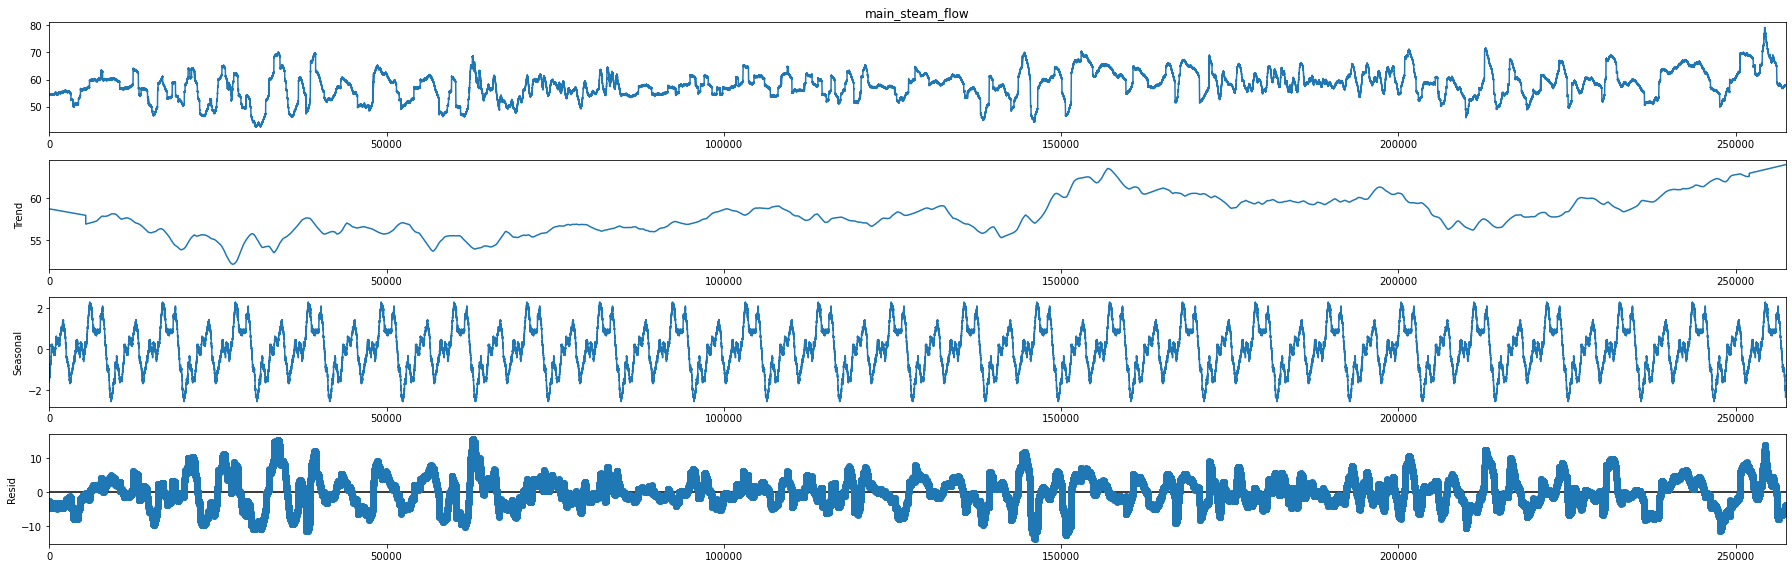

In [81]:
#model='additive'代表是加法模式，
#extrapolate_trend='freq'表示trend 、resid频率会从最近点开始，并且会对最近点的缺失值进行填充
#更多参数设置请参考官方文档：https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
decomposition = sm.tsa.seasonal_decompose(training.main_steam_flow, model='additive', extrapolate_trend='freq', period=3600 * 3)  
plt.rc('figure',figsize=(25, 8))
fig = decomposition.plot()
plt.show()

## 6.4 ACF vs PACF

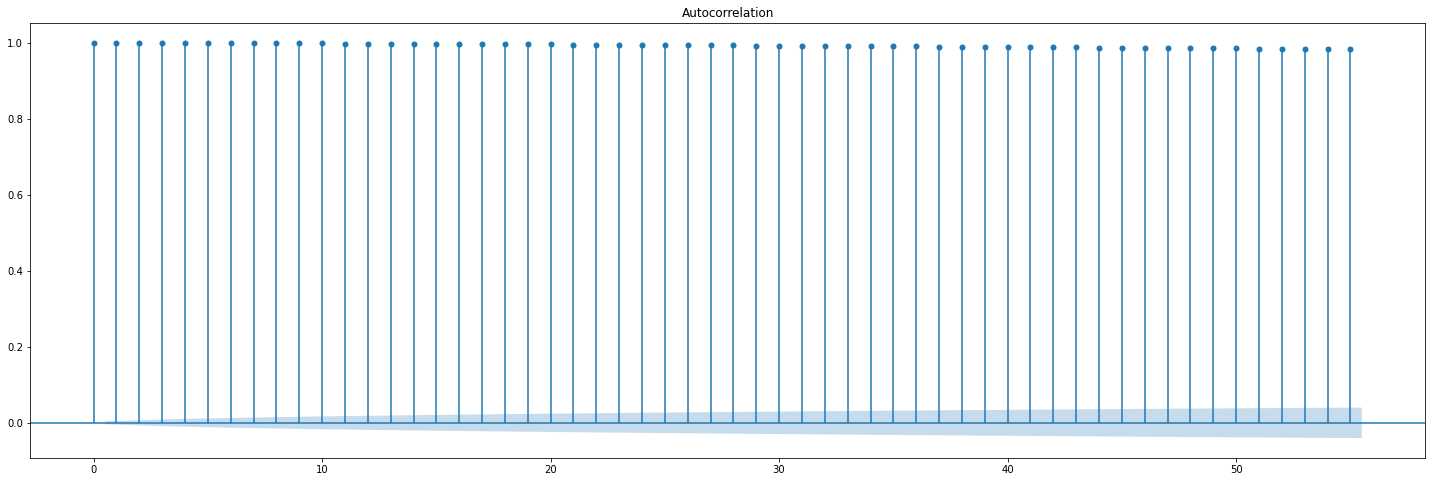

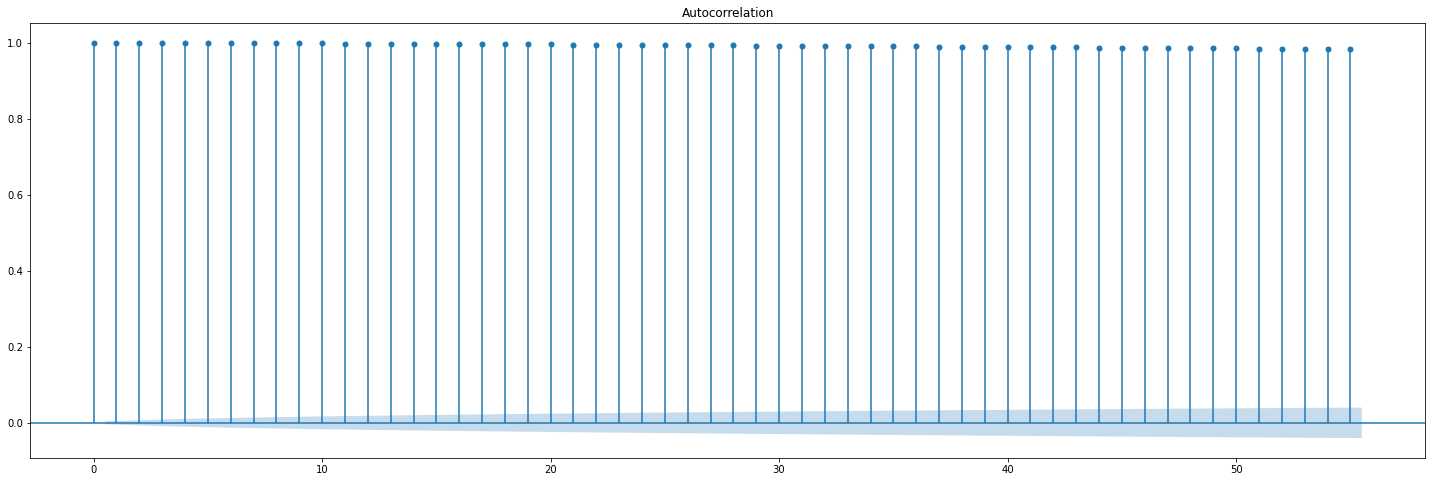

In [109]:
# plot ACF and PACF
plot_acf(ts_df.main_steam_flow)

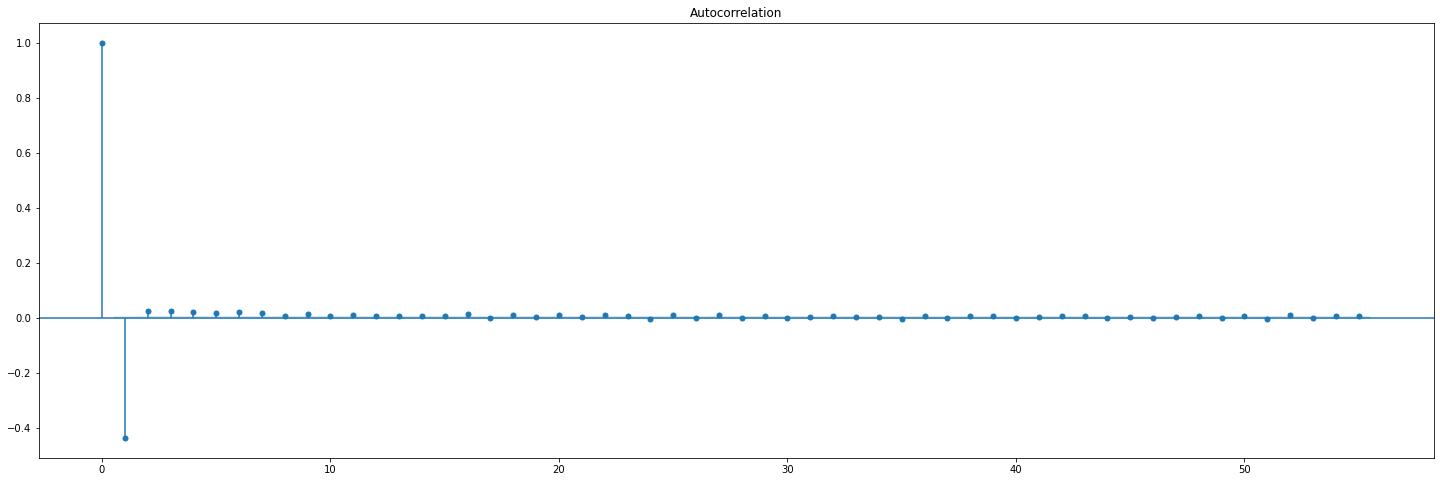

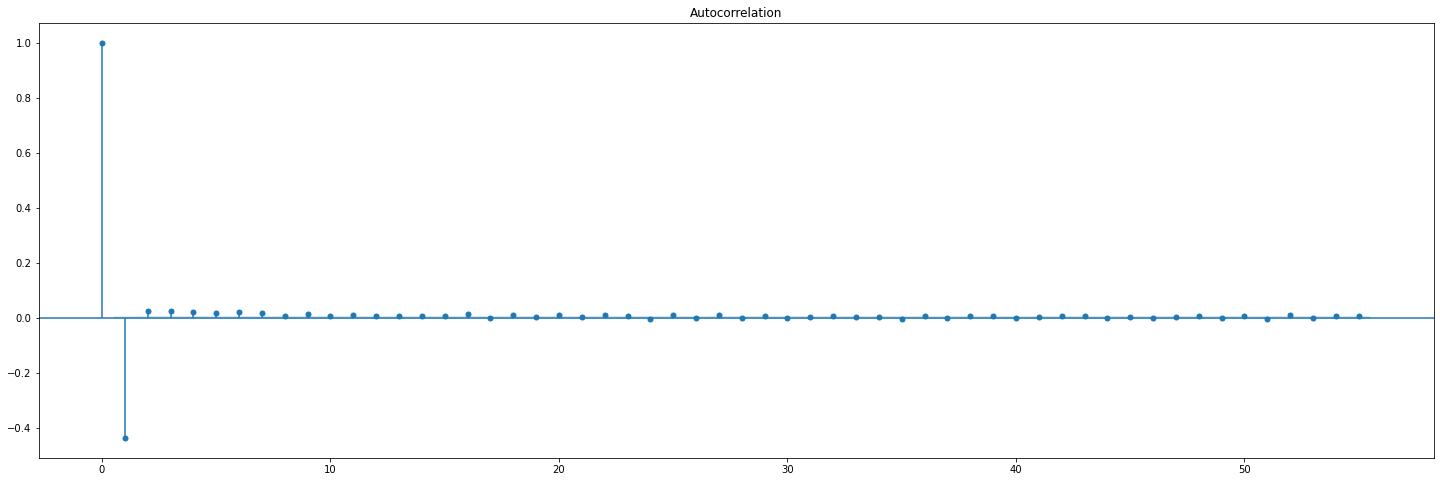

In [112]:
plot_acf(ts_df.diff1.dropna())

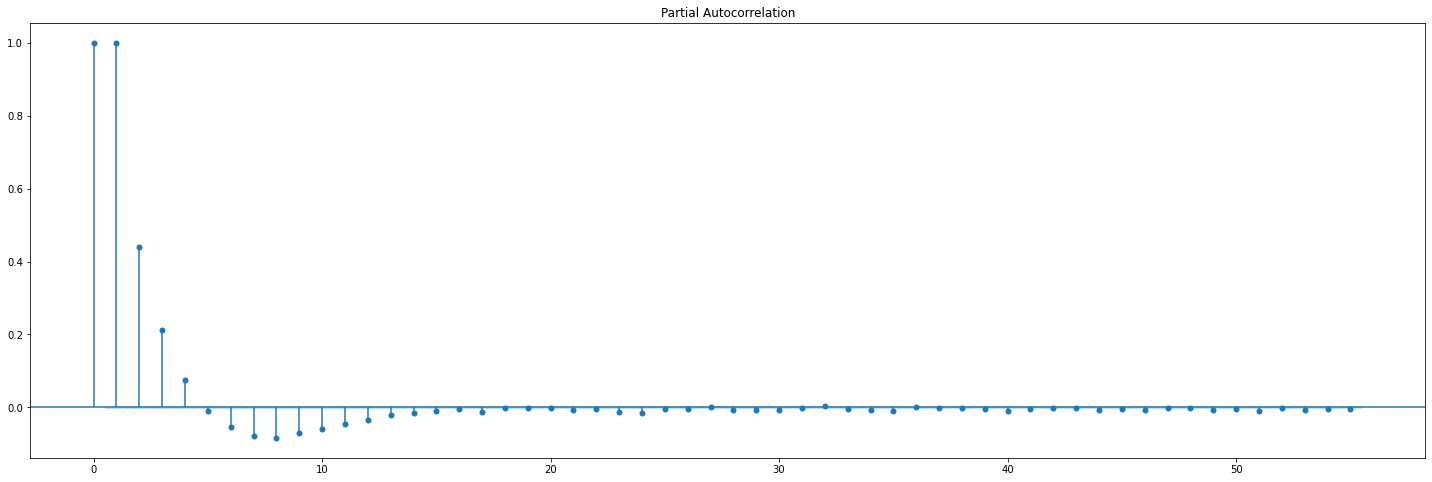

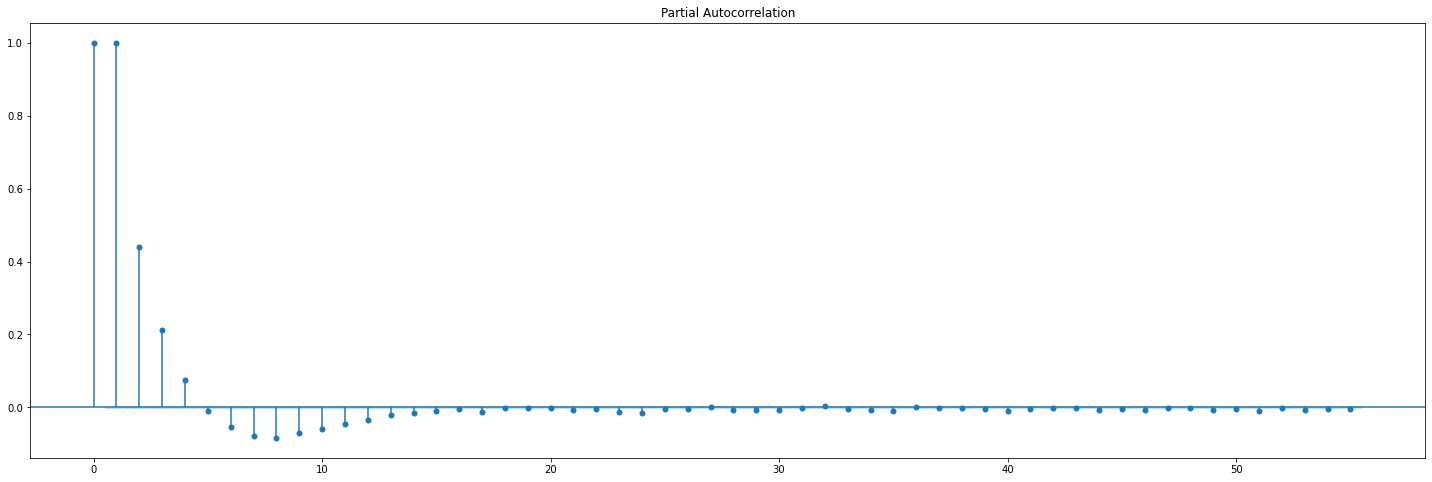

In [110]:
plot_pacf(ts_df.main_steam_flow)

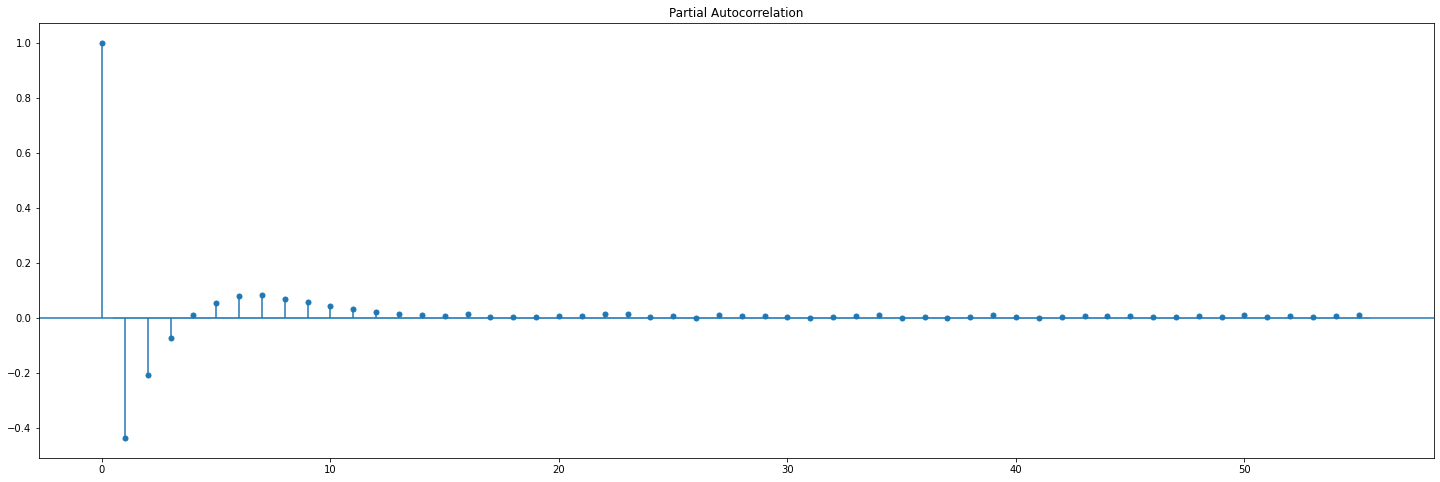

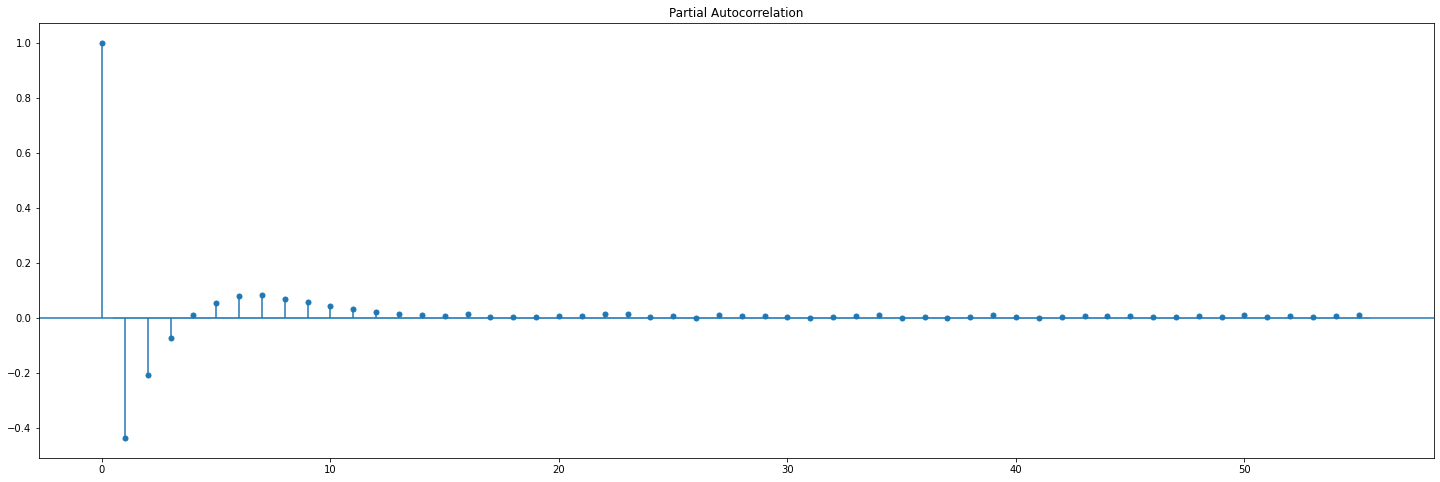

In [113]:
plot_pacf(ts_df.diff1.dropna())

### conclusion
- p value for stationary test -> 1.7085745173668486e-13 less than 0.05 which means our data is stationary
- p value for white noise test -> 0 less than 0.05 shows data has correlation